In [1]:
import os, sys
current_dir = os.path.dirname(os.path.abspath("../module.py"))
sys.path.append(current_dir)
from module import *

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,)
train_generator = train_datagen.flow_from_directory(
    './data-ch20/train',
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary')

Found 160 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    './data-ch20/test',
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary')

Found 120 images belonging to 2 classes.


In [4]:
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [5]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 activation_1 (Activation)   (None, 1)                 0

In [6]:
finetune_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

ealry_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [7]:
history = finetune_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    validation_steps=10,
    callbacks=[ealry_stopping_callback]
)

Epoch 1/20
32/32 [==============================] - 16s 465ms/step - loss: 0.6817 - accuracy: 0.5562 - val_loss: 0.5400 - val_accuracy: 0.8400
Epoch 2/20
32/32 [==============================] - 15s 476ms/step - loss: 0.4793 - accuracy: 0.8062 - val_loss: 0.5400 - val_accuracy: 0.7600
Epoch 3/20
32/32 [==============================] - 16s 495ms/step - loss: 0.4214 - accuracy: 0.8000 - val_loss: 0.3822 - val_accuracy: 0.8800
Epoch 4/20
32/32 [==============================] - 15s 483ms/step - loss: 0.4220 - accuracy: 0.7875 - val_loss: 0.3756 - val_accuracy: 0.8600
Epoch 5/20
32/32 [==============================] - 16s 494ms/step - loss: 0.3555 - accuracy: 0.8500 - val_loss: 0.3589 - val_accuracy: 0.8600
Epoch 6/20
32/32 [==============================] - 16s 501ms/step - loss: 0.2976 - accuracy: 0.9125 - val_loss: 0.2400 - val_accuracy: 0.9400
Epoch 7/20
32/32 [==============================] - 14s 432ms/step - loss: 0.3033 - accuracy: 0.8875 - val_loss: 0.2972 - val_accuracy: 0.8400

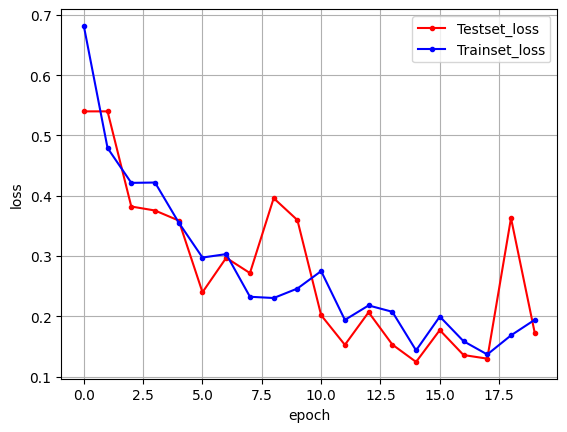

In [8]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()